# IBM Data Science Professional Certificate

## Capstone Project - The Battle of Neightboorhoods (Week 2) - Final Report
**Work prepared by Vinicius Bueno**

## 1. Business Problem

Immigration to Canada has been exponenentially growing in the past few decades. Immigration programs such as the Federal Skilled Worker, Express Entry and the Quebec Skilled Worker provide an easy and fast platform for individuals and families who want to start a new life in the Great White North.

This huge influx of expats brings people with different cultures, skills, languages and dreams. Some are lucky enough to find job in a related field, others have to subject themselves to blue collar jobs, such as Uber drivers or Starbucks barista, and lastly, a very small portion of immigrants decide to open their own business. This modest portion of immigrants, however, face a big challenge: what should they invest in? Often times, business that are successful in their homeland would go bankrupt in the first year due to culture differences.

Following this logic, a simple search on Google for trending business ideas in Canada show that "hipster stores" have been growing as never before. One succesful example is Urban Outfitters. They essentially sell everything related to lifestyle, their portfolio includes: women's and men's fashion apparel, footwear, beauty and wellness products, accessories, active-wear and gear, and housewares, as well as music, primarily vinyl records and cassettes. Therefore, opening a business like this one would be a great start to become a successful entrepeneur in Canada.

Another point, as important as deciding the niche of your investment, is to chose the right location to open the store. Here, I chose the city of Montreal. Montreal is the most populous municipality in the Canadian province of Quebec and the second-most populous municipality in Canada. Although it was historically the commercial capital of Canada, Montreal was surpassed in population and in economic strength by Toronto in the 1970s. However, it still remains an important centre of commerce, aerospace, transport, finance, pharmaceuticals, technology, design, education, art, culture, tourism, food, fashion, gaming, film, and world affairs. In 2017, Montreal was ranked the 12th most liveable city in the world by the Economist Intelligence Unit in its annual Global Liveability Ranking,and the best city in the world to be a university student in the QS World University Rankings. In summary, it is a vibrant city and not as saturated as Toronto and Vancouver, making it a great city to invest.

Montreal, however, is an enormous city. Therefore, one must take time to do research in order to make a more informed decision. The analysis will be carried out as to assisting new investors to make data-driven decisions on the new locations that are most suitable for their new stores in Montreal. These "hipster stores" are not considered high-end, thus they are not positioned in upper end of the fast fashion market. As such, they do not seek stores in the premium upmarket strips, but rather, in high traffic areas where consumers go for shopping, restaurants and entertainment. Foursquare data will be very helpful in making data-driven decisions about the best of those areas.

## 2. Data

**Data Requirements**

The main districts in Montreal are divided into "Arrondissements" and "Ville liées", which translates to districts and the "linked cities" that make part of the Great Montreal Area.

The data regarding the districts in Montreal needs to be researched and a suitable useable source identified. If it is found but is not in a useable form, data wrangling and cleaning will have to be performed.

The cleansed data will then be used alongside Foursquare data, which is readily available. Foursquare location data will be leveraged to explore or compare districts around Paris, identifying the high traffic areas where consumers go for shopping, dining and entertainment - the areas where the fashion brand are most interested in opening new stores.

**The data processing metholody for for this study includes the following:**

- Outline the initial data that is required: 

    - District data for Montreal including names, location data if available, and any other details required.

- Obtain the Data:

    - Research and find suitable sources for the district data for Montreal.

    - Access and explore the data to determine if it can be manipulated for our purposes.

- Initial Data Wrangling and Cleaning:

    - Clean the data and convert to a useable form as a dataframe.

- Data Analysis and Location Data:

    - Foursquare location data will be leveraged to explore or compare districts around Montreal.

    - Data manipulation and analysis to derive subsets of the initial data.

    - Identifying the high traffic areas using data visualisation and statistical analysis.

- Visualization:

    - Analysis and plotting visualizations.

    - Data visualization using various mapping libraries.

- Discussion and Conclusions:

    - Recomendations and results based on the data analysis.

    - Discussion of any limitations and how the results can be used, and any conclusions that can be drawn.

**Importing the libraries for the analysis**

In [4]:
#Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Data Research & Processing

As aformentioned, Montreal is divided into "Arrondissements" and "Ville liées", which translates to districts and the "linked cities" that make part of the Great Montreal Area.

Data for these districts is necessary to select the most suitable of these areas for new stores.

The raw data is for Montreal is pubicly available at <<http://donnees.ville.montreal.qc.ca/dataset/polygones-arrondissements>>, the official website for the city of Montreal. The data, however, is raw and needs to be processed.

**Importing the data**

In [5]:
# Download the dataset.
!wget -q -O 'limadmin.json' http://donnees.ville.montreal.qc.ca/dataset/00bd85eb-23aa-4669-8f1b-ba9a000e3dd8/resource/e9b0f927-8f75-458c-8fda-b5da65cc8b73/download/limadmin.json
print('Data downloaded!')

Data downloaded!


In [6]:
with open('limadmin.json') as json_data:
    montreal_data = json.load(json_data)

In [7]:
montreal_data

{'name': 'LIMADMIN',
 'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6207755934418, 45.5236508796029],
       [-73.6207872028152, 45.5236377690769],
       [-73.6208360983675, 45.5235925888858],
       [-73.6229064657189, 45.5212544720817],
       [-73.6244768311808, 45.5195510388648],
       [-73.6267218934442, 45.5165789048672],
       [-73.6260049185647, 45.5162468899168],
       [-73.6252809111825, 45.5159299069007],
       [-73.6247608646889, 45.5156979294181],
       [-73.6247258132996, 45.5156978780009],
       [-73.6240228217757, 45.5153728701655],
       [-73.6238049108022, 45.5152729444053],
       [-73.6225748083554, 45.5147068651661],
       [-73.6211108895945, 45.5140419351202],
       [-73.6181778143121, 45.512730938516],
       [-73.6176638457886, 45.5124989304851],
       [-73.618879835197, 45.5111338573937],
       [-73.6169198104361, 45.5102758011751],
       [-73.6178927943616, 45.5091

## Wrangling and Cleaning the Data into Pandas Dataframe

In [8]:
neighborhoods_data = montreal_data['features']

In [9]:
neighborhoods_data[0]

{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-73.6207755934418, 45.5236508796029],
     [-73.6207872028152, 45.5236377690769],
     [-73.6208360983675, 45.5235925888858],
     [-73.6229064657189, 45.5212544720817],
     [-73.6244768311808, 45.5195510388648],
     [-73.6267218934442, 45.5165789048672],
     [-73.6260049185647, 45.5162468899168],
     [-73.6252809111825, 45.5159299069007],
     [-73.6247608646889, 45.5156979294181],
     [-73.6247258132996, 45.5156978780009],
     [-73.6240228217757, 45.5153728701655],
     [-73.6238049108022, 45.5152729444053],
     [-73.6225748083554, 45.5147068651661],
     [-73.6211108895945, 45.5140419351202],
     [-73.6181778143121, 45.512730938516],
     [-73.6176638457886, 45.5124989304851],
     [-73.618879835197, 45.5111338573937],
     [-73.6169198104361, 45.5102758011751],
     [-73.6178927943616, 45.509173781791],
     [-73.6160398238206, 45.5083287473535],
     [-73.6162207774673, 45.5081327369473],
     [

In [10]:
# define the dataframe columns
column_names = ['Quartier', 'Type', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [11]:
neighborhoods

,Quartier,Type,Latitude,Longitude


In [12]:
for data in neighborhoods_data:
    quartier = data['properties']['NOM'] 
    type_ = data['properties']['TYPE']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0][0][0][1]
    neighborhood_lon = neighborhood_latlon[0][0][0][0]
    
    neighborhoods = neighborhoods.append({'Quartier': quartier,
                                          'Type': type_,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head(34)

,Quartier,Type,Latitude,Longitude
0,Outremont,Arrondissement,45.523651,-73.620776
1,LaSalle,Arrondissement,45.421797,-73.666104
2,Mont-Royal,Ville liée,45.526307,-73.650751
3,Ville-Marie,Arrondissement,45.534758,-73.530129
4,Le Plateau-Mont-Royal,Arrondissement,45.539899,-73.559231
5,Hampstead,Ville liée,45.478934,-73.656011
6,Le Sud-Ouest,Arrondissement,45.448390,-73.629082
7,Rivière-des-Prairies-Pointe-aux-Trembles,Arrondissement,45.633589,-73.624748
8,Lachine,Arrondissement,45.421785,-73.722989
9,Dorval,Ville liée,45.481813,-73.794704


In [14]:
neighborhoods.shape

(34, 4)

**The shape function shows that there are 34 "arrondissements" and "villes liées" in Montreal.**

### Now we can retrieve the latitude and longitude of Montreal using the geopy library

In [15]:
# Retrieve the Latitude and Longitude for Montreal
from geopy.geocoders import Nominatim 

address = 'Montreal'

# Define the user_agent as montreal_explorer
geolocator = Nominatim(user_agent="montreal_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Montreal, Canada are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Montreal, Canada are 45.4972159, -73.6103642.


### Now we can create the map of Montreal with its districts from the dataframe marked as circles.

In [20]:
#The geographical coordinates of Montreal, Canada are 45.4972159, -73.6103642.
# create map of Montreal using the above latitude and longitude values
map_montreal = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Quartier']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_montreal)  
    
map_montreal

### Now we can use the Foursquare API to explore the neighborhoods in Montreal

In [21]:
CLIENT_ID = 'JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T'
CLIENT_SECRET = 'GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T
CLIENT_SECRET:GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX


## Exploratory data analysis

### Firstly, we will explore the first district in our dataframe to become familiar with the data

In [22]:
# Explore the first Neighborhood in our dataframe.

neighborhoods.loc[0, 'Quartier']

'Outremont'

**The first neighborhood is the dataframe is Outremont.**

In [24]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Quartier'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood Outremont are 45.5236508796029, -73.6207755934418.


### Now we will get the top 100 venues that are in Outremont within a radius of 1500 meters

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JQ1TJCVCXPGECON3UIWYI3RF2JHPG5WM55IQLXKJTRGGXN5T&client_secret=GN4TWXHUWAEJONH4FFRRL21OQVTM5RNH2NZ5KDGNPX2RVJOX&v=20180605&ll=45.5236508796029,-73.6207755934418&radius=1500&limit=100'

In [26]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e1a2700006dce001bd773d9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ahuntsic-Cartierville',
  'headerFullLocation': 'Ahuntsic-Cartierville, Montreal',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 191,
  'suggestedBounds': {'ne': {'lat': 45.53715089310291,
    'lng': -73.60154276005223},
   'sw': {'lat': 45.51015086610288, 'lng': -73.64000842683139}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc3c00babf495218e44c493',
       'name': 'Bombay Mahal',
       'location': {'address': '1001 boul. Jean-Talon Ouest',
        'crossStreet': 'at Birnam',
        'lat': 45.524622964357185,
        'lng': -73.62573576155916

### Now, we will define the function that extracts the category of the venue

In [27]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Then, we will structure the json file into a pandas dataframe

In [28]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Bombay Mahal,Indian Restaurant,45.524623,-73.625736
1,Damas,Mediterranean Restaurant,45.522596,-73.613112
2,Mamie Clafoutis,Bakery,45.521466,-73.613998
3,Punjab Palace,Indian Restaurant,45.525239,-73.625190
4,Provisions,Restaurant,45.521631,-73.613866
5,Dispatch Coffee,Café,45.528903,-73.616104
6,Café Prague,Café,45.521059,-73.614384
7,Sushi Plus,Sushi Restaurant,45.521308,-73.624082
8,Maison Indian Curry,North Indian Restaurant,45.524723,-73.625520
9,Restaurant le Mile-Ex,Diner,45.528540,-73.614308


In [29]:
# Check how many venues there are in Outremont within a radius of 1500 meters

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Now, we will create a "nearby venues function" for all the neighborhoods in Montreal

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quartier', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Then, we will create a new dataframe for the venues of Montreal called montreal_venues

In [31]:
# Create a new dataframe called montreal_venues.

montreal_venues = getNearbyVenues(names=neighborhoods['Quartier'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Outremont
LaSalle
Mont-Royal
Ville-Marie
Le Plateau-Mont-Royal
Hampstead
Le Sud-Ouest
Rivière-des-Prairies-Pointe-aux-Trembles
Lachine
Dorval
Montréal-Nord
L'Île-Bizard-Sainte-Geneviève
Kirkland
Dollard-des-Ormeaux
Senneville
Ahuntsic-Cartierville
Côte-Saint-Luc
Saint-Léonard
Montréal-Ouest
Pointe-Claire
L'Île-Dorval
Mercier-Hochelaga-Maisonneuve
Côte-des-Neiges-Notre-Dame-de-Grâce
Rosemont-La Petite-Patrie
Saint-Laurent
Beaconsfield
Villeray-Saint-Michel-Parc-Extension
Westmount
Montréal-Est
Anjou
Pierrefonds-Roxboro
Sainte-Anne-de-Bellevue
Verdun
Baie-d'Urfé


In [32]:
print(montreal_venues.shape)
montreal_venues.head(250)

(936, 7)


,Quartier,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Outremont,45.523651,-73.620776,Bombay Mahal,45.524623,-73.625736,Indian Restaurant
1,Outremont,45.523651,-73.620776,Damas,45.522596,-73.613112,Mediterranean Restaurant
2,Outremont,45.523651,-73.620776,Mamie Clafoutis,45.521466,-73.613998,Bakery
3,Outremont,45.523651,-73.620776,Punjab Palace,45.525239,-73.625190,Indian Restaurant
4,Outremont,45.523651,-73.620776,Provisions,45.521631,-73.613866,Restaurant
5,Outremont,45.523651,-73.620776,Dispatch Coffee,45.528903,-73.616104,Café
6,Outremont,45.523651,-73.620776,Café Prague,45.521059,-73.614384,Café
7,Outremont,45.523651,-73.620776,Sushi Plus,45.521308,-73.624082,Sushi Restaurant
8,Outremont,45.523651,-73.620776,Maison Indian Curry,45.524723,-73.625520,North Indian Restaurant
9,Outremont,45.523651,-73.620776,Restaurant le Mile-Ex,45.528540,-73.614308,Diner


**There are 936 venues distributed in 34 neighborhoods in Montreal.**

### Now we will check how many venues were returned for each neighborhood (limited to 100 venues per neighborhood)

In [33]:
montreal_venues.groupby('Quartier').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Quartier,,,,,,
Ahuntsic-Cartierville,7,7,7,7,7,7
Anjou,36,36,36,36,36,36
Baie-d'Urfé,4,4,4,4,4,4
Beaconsfield,4,4,4,4,4,4
Côte-Saint-Luc,20,20,20,20,20,20
Côte-des-Neiges-Notre-Dame-de-Grâce,20,20,20,20,20,20
Dollard-des-Ormeaux,24,24,24,24,24,24
Dorval,62,62,62,62,62,62
Hampstead,28,28,28,28,28,28


### Then, we will calculate how many unique venue categories there are.

In [34]:
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(montreal_venues['Venue Category'].unique())))

There are 175 unique venue categories.


### Now, we will analyze each one of the neighborhoods as we did for Outremont

In [35]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
montreal_onehot = pd.get_dummies(montreal_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
montreal_onehot['Neighborhood'] = montreal_venues['Quartier'] 

# move neighborhood column to the first column
fixed_columns = [montreal_onehot.columns[-1]] + list(montreal_onehot.columns[:-1])
montreal_onehot = montreal_onehot[fixed_columns]

montreal_onehot

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,...,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Outremont,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# The shape of the dataframe is
montreal_onehot.shape

(936, 176)

### Now, we will group the rows by neighborhood and take the mean of the occurence frequency of each category

In [37]:
montreal_grouped = montreal_onehot.groupby('Neighborhood').mean().reset_index()
montreal_grouped

,Neighborhood,ATM,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,...,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Ahuntsic-Cartierville,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
1,Anjou,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.027778,0.00,0.00,0.00,0.000000
2,Baie-d'Urfé,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
3,Beaconsfield,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
4,Côte-Saint-Luc,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.05,0.000000
5,Côte-des-Neiges-Notre-Dame-de-Grâce,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.05,0.000000
6,Dollard-des-Ormeaux,0.000000,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.041667,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
7,Dorval,0.000000,0.000000,0.016129,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016129,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.032258
8,Hampstead,0.000000,0.000000,0.000000,0.00,0.000000,0.035714,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000
9,Kirkland,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000


In [38]:
# The shape of the grouped data is
montreal_grouped.shape

(33, 176)

### Then, we will retrieve each neighborhood's top 10 most common venues

In [39]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in montreal_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = montreal_grouped[montreal_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahuntsic-Cartierville----
                           venue  freq
0                           Park  0.43
1                       Pharmacy  0.14
2                    Gas Station  0.14
3                 Gymnastics Gym  0.14
4           Fast Food Restaurant  0.14
5                            ATM  0.00
6                   Optical Shop  0.00
7           Outdoor Supply Store  0.00
8  Paper / Office Supplies Store  0.00
9          Performing Arts Venue  0.00


----Anjou----
                    venue  freq
0                Pharmacy  0.08
1             Supermarket  0.06
2            Liquor Store  0.06
3      Italian Restaurant  0.06
4  Furniture / Home Store  0.06
5          Hardware Store  0.06
6          Breakfast Spot  0.06
7              Restaurant  0.06
8              Sports Bar  0.03
9    Gym / Fitness Center  0.03


----Baie-d'Urfé----
                           venue  freq
0                       Pharmacy  0.25
1                            Pub  0.25
2               Business Service  

### Now we will have that data transformed into a pandas dataframe and sort the venues in descending order

In [42]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### The top 10 venue categories for each neighborhood
We will then create a results table that can provide, at a glance, information for all of the neighborhoods. This is a highly iterative process, hence we can refer back to this table for meaningful insights about the top categories of businesses in all the neighbourhoods later on.

In [43]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
montreal_venues_sorted = pd.DataFrame(columns=columns)
montreal_venues_sorted['Neighborhood'] = montreal_grouped['Neighborhood']

for ind in np.arange(montreal_grouped.shape[0]):
    montreal_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montreal_grouped.iloc[ind, :], num_top_venues)

montreal_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahuntsic-Cartierville,Park,Pharmacy,Fast Food Restaurant,Gymnastics Gym,Gas Station,Yoga Studio,Flower Shop,Flea Market,Fish Market,Farmers Market
1,Anjou,Pharmacy,Restaurant,Hardware Store,Supermarket,Italian Restaurant,Furniture / Home Store,Liquor Store,Breakfast Spot,Paper / Office Supplies Store,Recreation Center
2,Baie-d'Urfé,Pub,Pharmacy,Business Service,Sporting Goods Shop,Dessert Shop,Factory,Food,Flower Shop,Deli / Bodega,Flea Market
3,Beaconsfield,Pub,Pharmacy,Business Service,Sporting Goods Shop,Dessert Shop,Factory,Food,Flower Shop,Deli / Bodega,Flea Market
4,Côte-Saint-Luc,Skating Rink,Furniture / Home Store,Gym,Bank,Shopping Mall,Movie Theater,Restaurant,Rental Service,Rental Car Location,Café
5,Côte-des-Neiges-Notre-Dame-de-Grâce,Skating Rink,Furniture / Home Store,Gym,Bank,Shopping Mall,Movie Theater,Restaurant,Rental Service,Rental Car Location,Café
6,Dollard-des-Ormeaux,Pizza Place,Park,Fast Food Restaurant,Grocery Store,Breakfast Spot,Cosmetics Shop,Liquor Store,Pet Store,Coffee Shop,Restaurant
7,Dorval,Fast Food Restaurant,Gym,Italian Restaurant,Yoga Studio,Pharmacy,Steakhouse,Burger Joint,Coffee Shop,Skating Rink,Breakfast Spot
8,Hampstead,Gym,Movie Theater,Park,Discount Store,Shopping Mall,Restaurant,Salon / Barbershop,Fast Food Restaurant,Skating Rink,Clothing Store
9,Kirkland,Furniture / Home Store,Convenience Store,Italian Restaurant,Discount Store,Clothing Store,Restaurant,Sandwich Place,Paper / Office Supplies Store,Moving Target,Movie Theater


In [44]:
# The shape of the sorted data is
montreal_venues_sorted.shape

(33, 11)

## The business types criteria that potential customers in a Hipster Retail Store would possibly be _Gyms, Coffee Shops_ and _Parks_.

#### Therefore, we will look at their frequency of occurance for all the neighborhoods in Montreal, isolating these specific categorical venues.

These are the venue types that customers of a a typical hipster retail store would want visit, which makes its location the perfect spot for a new store. We will use violin plot from the seaborn library because it is a great way to visualise frequency distribution datasets. Violin plots display density estimation of the underlying distribution.

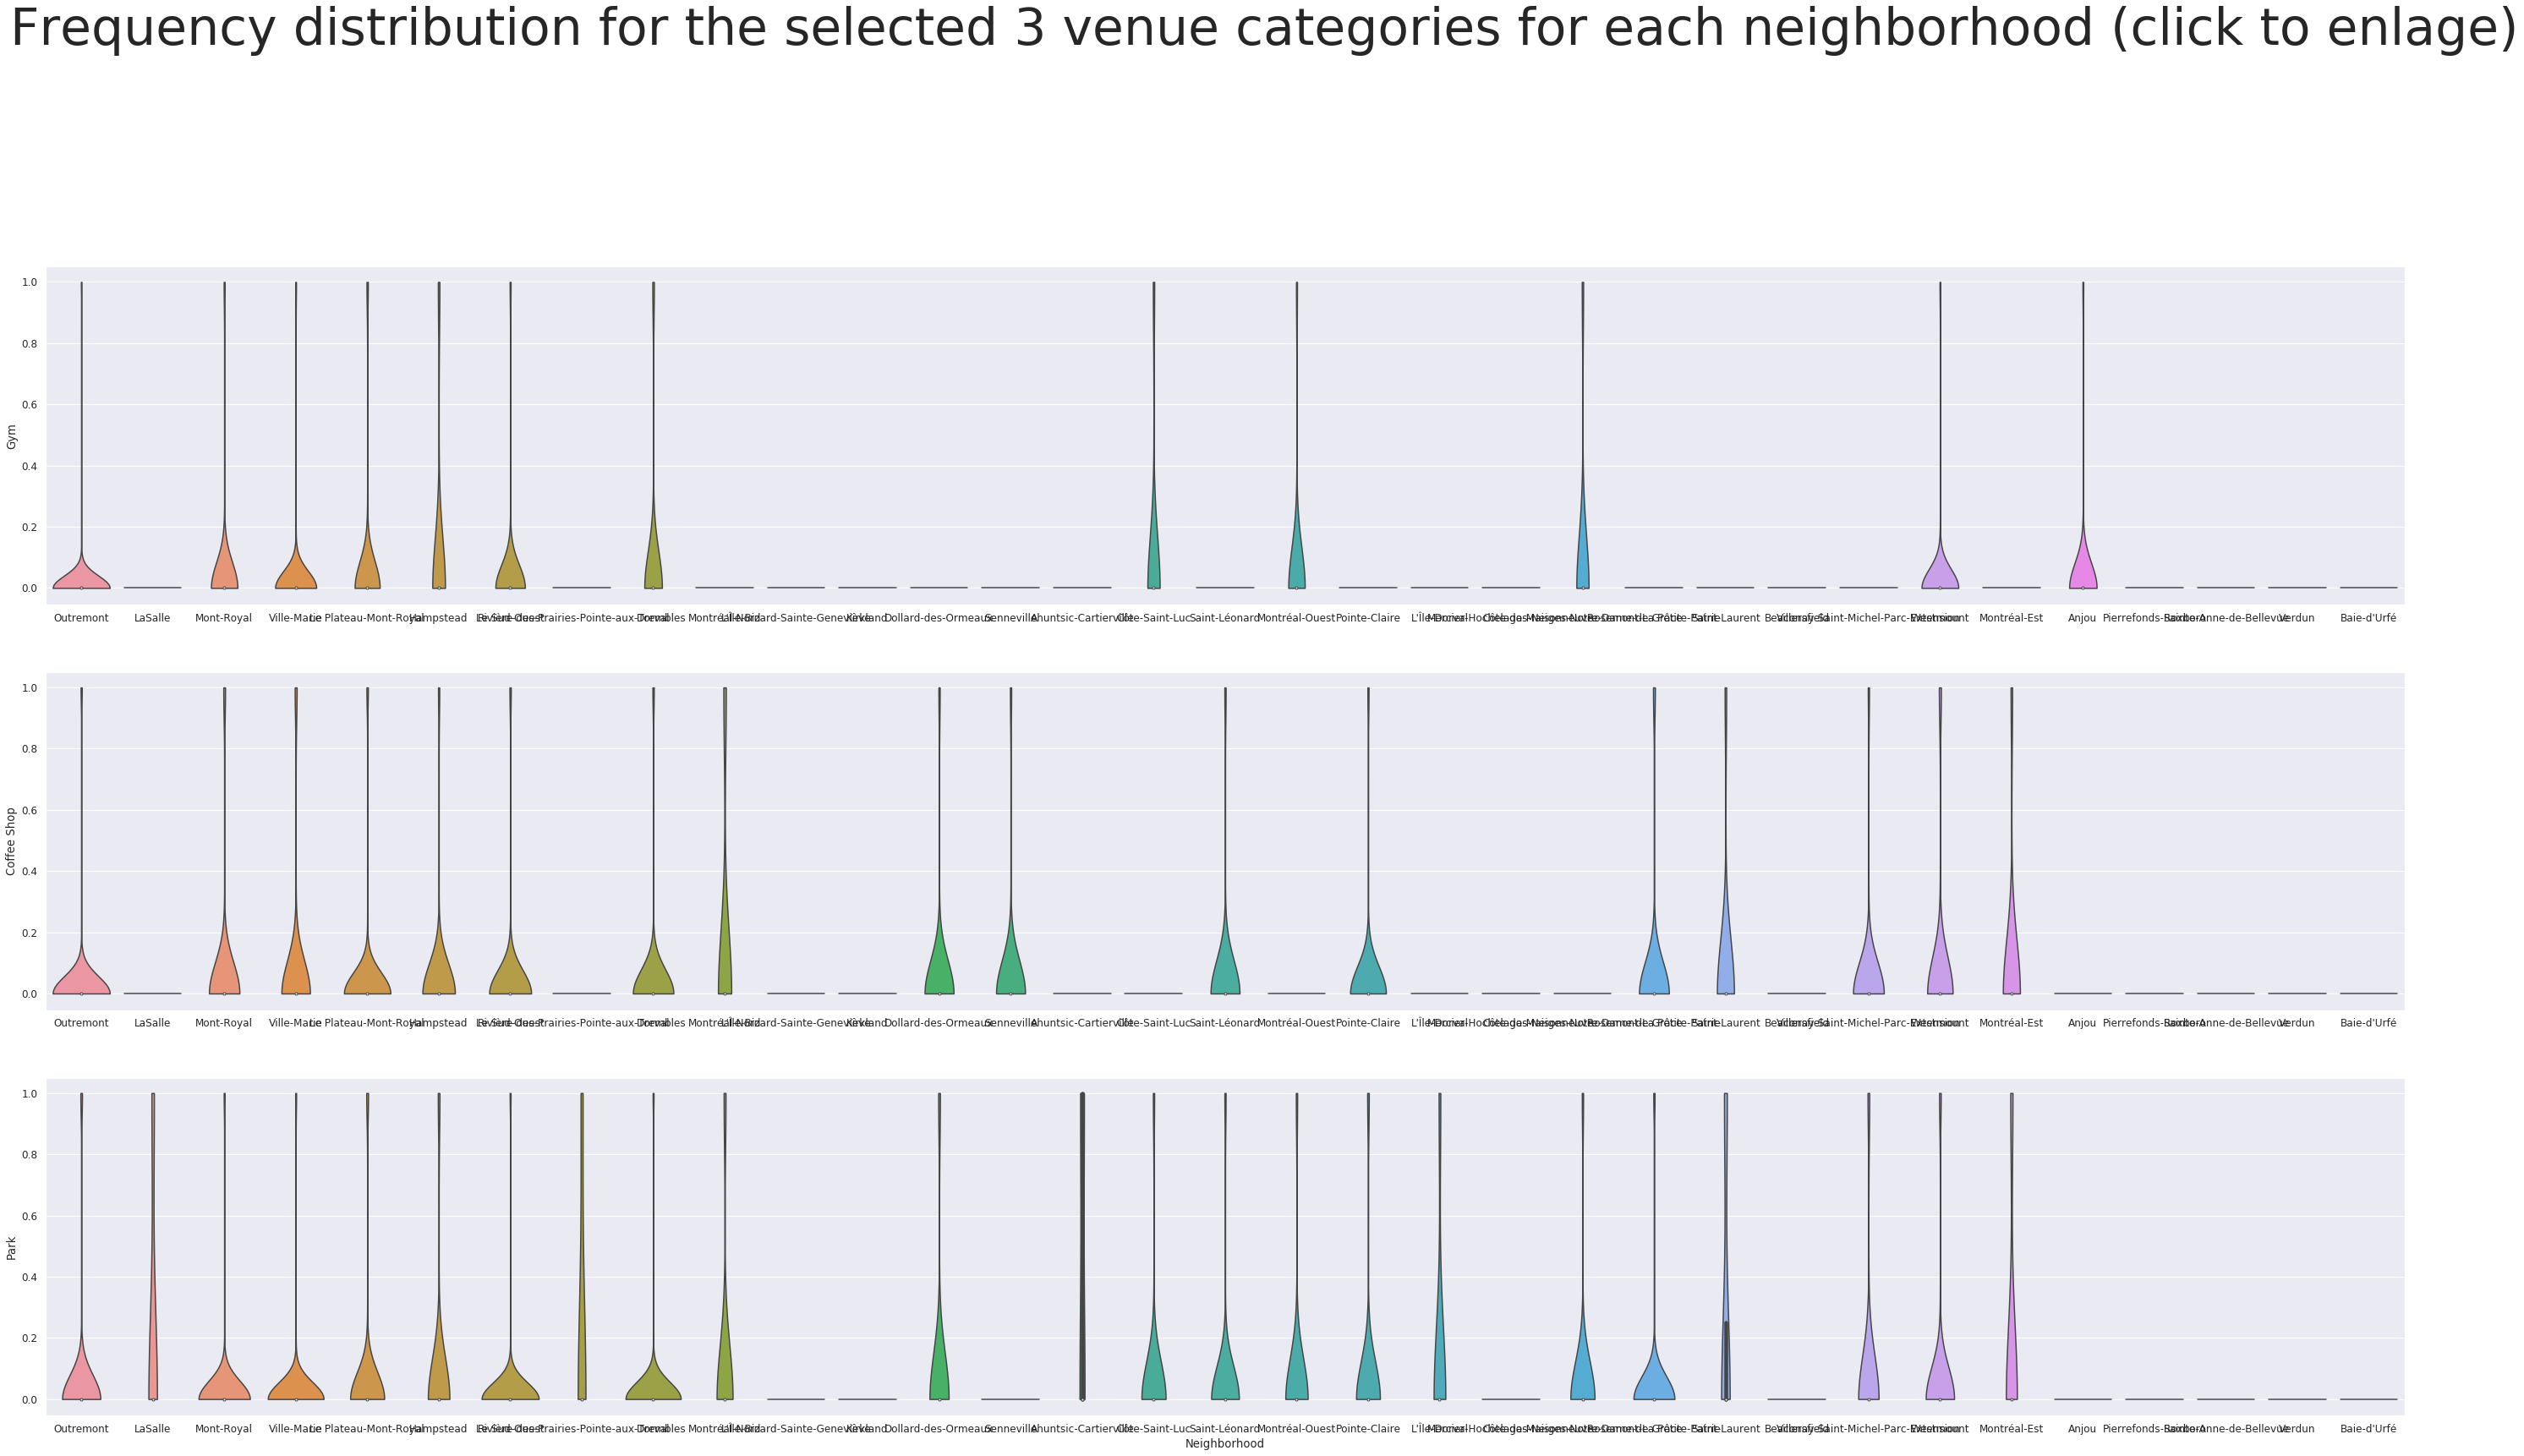

In [45]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="Gym", data=montreal_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=montreal_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=montreal_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the selected 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

Several neighborhoods have these specific locations in their areas. After some thought, I decided to further explore adding one more important type of business to have around hipster retail stores, which are restaurants.

The more restaurants around, the more people will pass by the store after or before their meals.

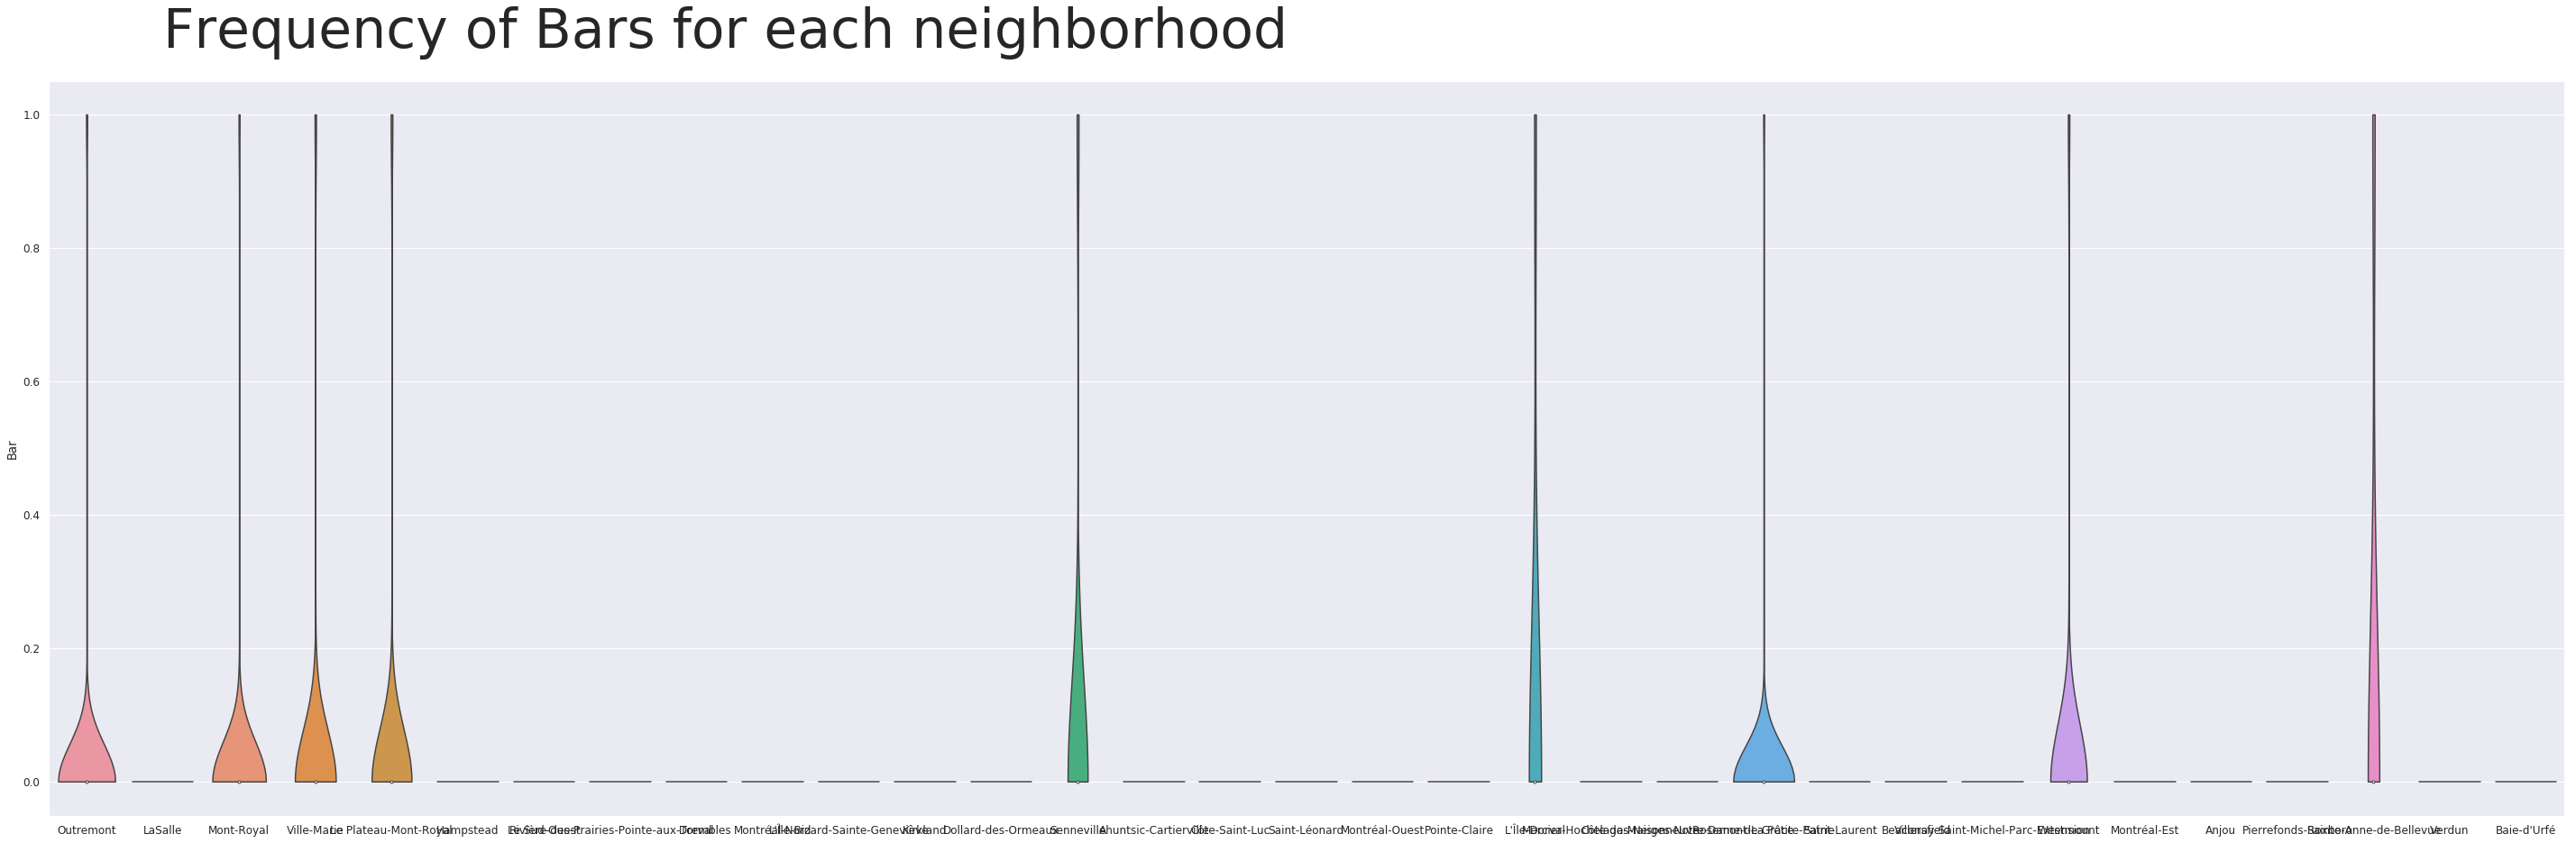

In [46]:
# Add the Restuarant to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Bar", data=montreal_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Bars for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Bars.png", dpi=240)
plt.show()

### Adding this new category to the previous plots, we will have the following distributions:

<function matplotlib.pyplot.show(*args, **kw)>

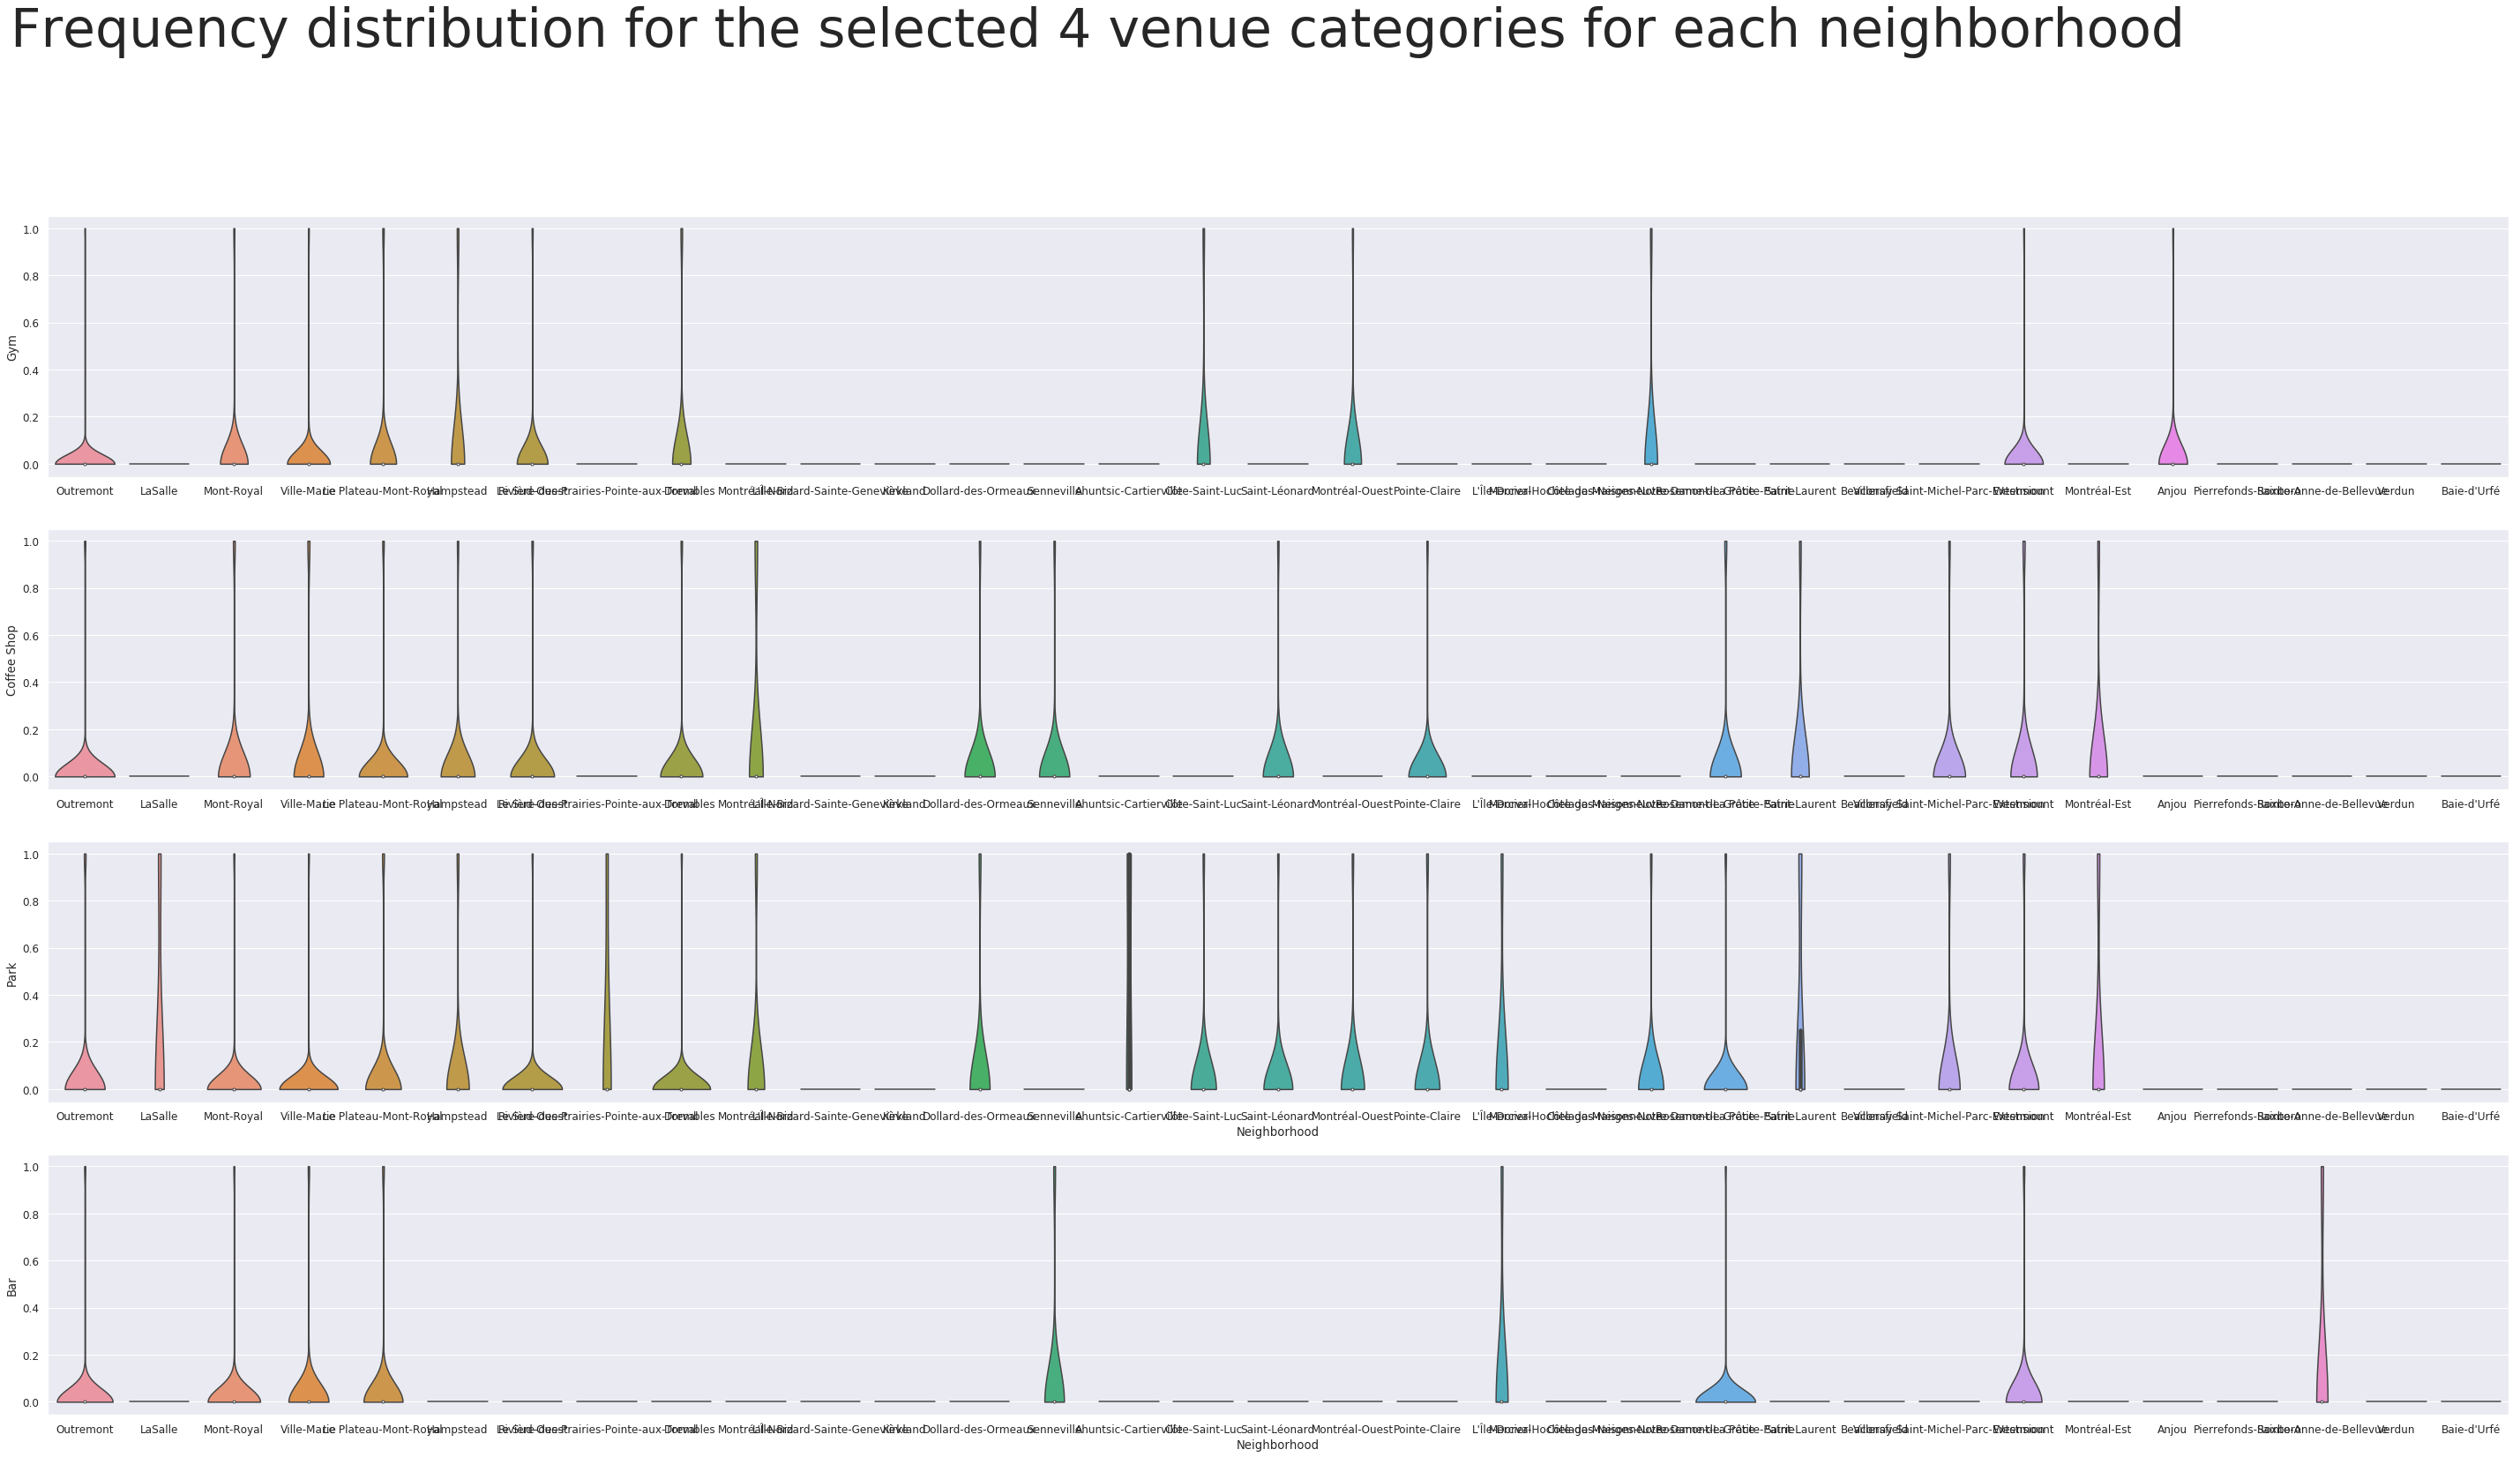

In [48]:
# Restaurant has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="Gym", data=montreal_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=montreal_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Park", data=montreal_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Bar", data=montreal_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the selected 4 venue categories for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_4_categories.png", dpi=240)
plt.show

## 4. Discussion

From the results acquired, we can focus in four neighborhood:

- Outremont;
- Mont-Royal;
- Ville-Marie;
- Plateau-Mont-Royal;

Plateau-Mont-Royal, however, is already saturated with hispter stores and other related business. Therefore, it would not be a great idea to start a new business in such a hostile and competitive environment.

Following this rationale, we will proceed with Outremont, Mont-Royal and Ville-Marie.

### Let's mark these three neighborhoods in the map for better visualization:

In [49]:
# The csv of the 3 prospective neighborhoods was uploaded to GitHub for access and reference
# We will download and put into a new dataframe called candidates

candidates = pd.read_csv('https://raw.githubusercontent.com/Vinibueno92/github-example/master/candidates_quartier.csv')
candidates

,Quartier,Latitude,Longitude
0,Outremont,45.523651,-73.620776
1,Mont-Royal,45.526307,-73.650751
2,Ville-Marie,45.534758,-73.530129


### Then we will use this dataframe to mark the districts in the map of Montreal using folium:

In [50]:
# Create a folium map of Montreal with the 3 neighborhoods superimposed on the map
map_candidates = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(candidates['Latitude'], candidates['Longitude'], candidates['Quartier']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_candidates)  
    
map_candidates

## 5. Conclusions

It is definitely not a surprise that these neighborhoods are all very centrally located in Montreal. Locations fitting the criteria for popular venues would normally be in central locations in many cities of the world.

From this visualisation it is clear that on a practical level, with no data to base decisions on, starting from 34 different regions is not optimal and a waste of time. Researching and then visiting them all would be a daunting and time consuming task. Thus, we have narrowed down significantly the search area from 34 regions to 3 prospective neighborhoods, which should be a great location to open a new business. In this case, a hipster retail store.

Also, it is important to mention that there are many other ways this analysis could have been performed. Maybe with different methodolgies and/or data sources. I also have to agree that it was a very simplistic analysis, not taking into account socioeconomic data, statistics on interests and expenditure level in the community, or really any data that would be actually helpful to the recommendation system except trending venues in each neighborhood.  This analysis is not the final answer though, it is rather a starting point that will guide the next part of the process to find specific store locations. Ideally, the next step will involve using knowledge from the industry, and perhaps, using more statistics of the socioeconomic conditions of the city itself. In summary, the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.